In [1]:
# Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Cargar datos desde un archivo CSV
df = pd.read_csv('/content/sensores.csv')

# Muestra la dimensión del dataset
print(df.shape)


(1000, 4)


In [3]:
# Muestra las primeras 5 líneas de datos
print(df.head(5))

# Obtén información sobre las columnas y el tipo de datos de cada una
print(df.info())

# Revisa valores nulos por columna
print(df.isnull().sum())


   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        1000 non-null   int64  
 1   Distancia (cm)    970 non-null    float64
 2   Velocidad (cm/s)  970 non-null    float64
 3   Temperatura (°C)  970 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None
Tiempo (s)           0
Distancia (cm)      30
Velocidad (cm/s)    30
Temperatura (°C)    30
dtype: int64


In [4]:
# a) Eliminar filas con valores nulos
df = df.dropna()
print("Dimensión tras eliminar nulos:", df.shape)

# b) Filtrar valores atípicos (ejemplo: velocidad negativa)
# Detectar automáticamente la columna de velocidad
candidatas_vel = [c for c in df.columns if c.lower() in ["velocidad", "speed", "vel"]]
if len(candidatas_vel) == 0:
    candidatas_vel = [c for c in df.columns if "vel" in c.lower() or "speed" in c.lower()]

if candidatas_vel:
    col_vel = candidatas_vel[0]
    df = df[df[col_vel] >= 0]
    print(f"Se filtraron valores negativos en la columna '{col_vel}'.")
    print("Dimensión tras limpiar:", df.shape)
else:
    print("⚠️ No se encontró columna de velocidad. Se omite este paso.")


Dimensión tras eliminar nulos: (913, 4)
Se filtraron valores negativos en la columna 'Velocidad (cm/s)'.
Dimensión tras limpiar: (913, 4)


In [5]:
# Normalizar solo columnas numéricas con Min-Max Scaling (0-1)
numeric_cols = df.select_dtypes(include="number").columns
scaler = MinMaxScaler()
df_normalizado = df.copy()
df_normalizado[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Columnas numéricas normalizadas (0-1):")
print(list(numeric_cols))


Columnas numéricas normalizadas (0-1):
['Tiempo (s)', 'Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']


In [6]:
# Ejemplo: obtener valores máximos y mínimos de un sensor
for col in numeric_cols:
    print(f"Sensor {col}: min={df[col].min()}  max={df[col].max()}")


Sensor Tiempo (s): min=0  max=999
Sensor Distancia (cm): min=10.41688207  max=99.9745906
Sensor Velocidad (cm/s): min=0.16091318  max=49.97068629
Sensor Temperatura (°C): min=20.00017452  max=34.96731284


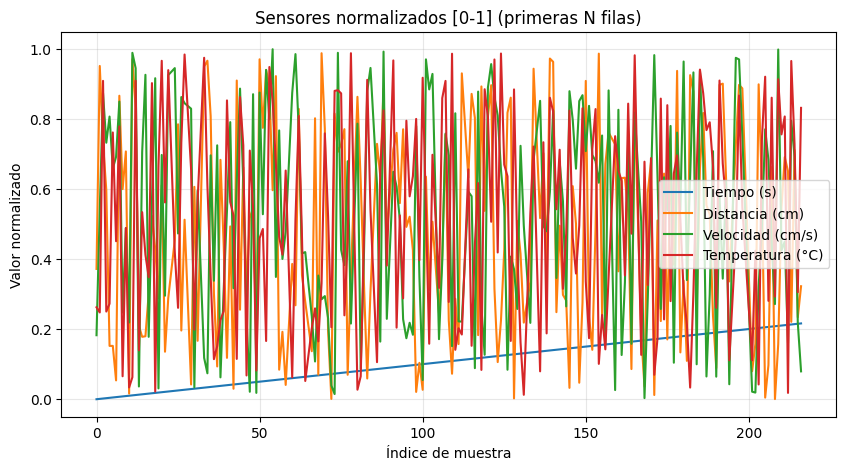

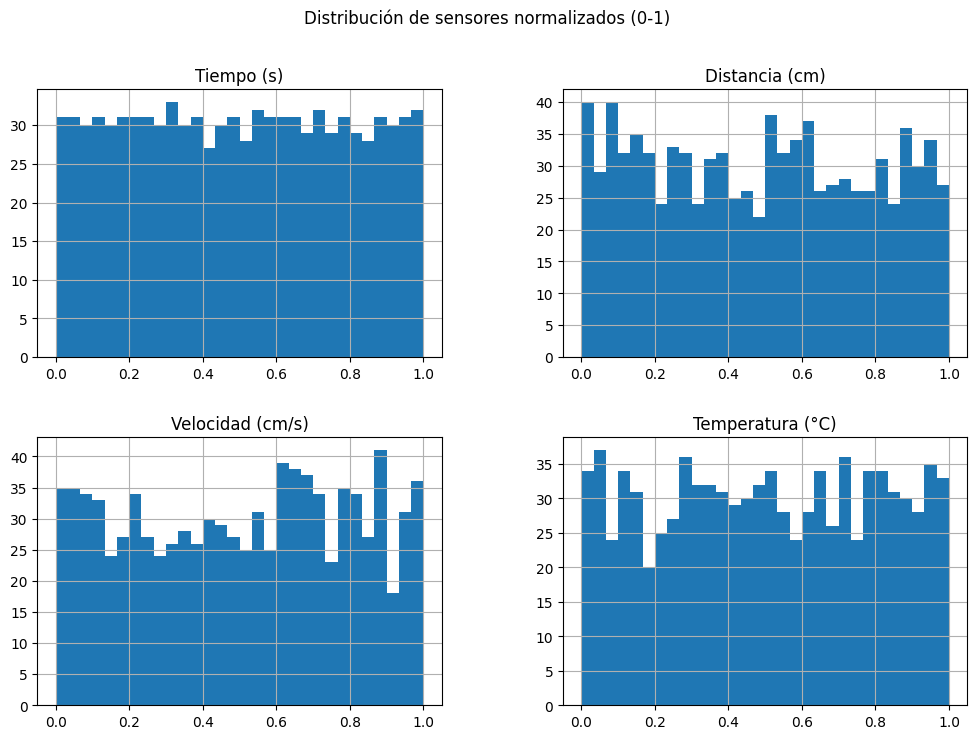

In [7]:
# Gráfico de líneas de las primeras N muestras de hasta 5 sensores
N = 200
cols_para_plot = list(numeric_cols[:5])
if len(cols_para_plot) > 0:
    df_normalizado[cols_para_plot].head(N).plot(figsize=(10, 5))
    plt.title("Sensores normalizados [0-1] (primeras N filas)")
    plt.xlabel("Índice de muestra")
    plt.ylabel("Valor normalizado")
    plt.grid(True, alpha=0.3)
    plt.show()

# Histograma de distribuciones de los sensores normalizados
df_normalizado[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribución de sensores normalizados (0-1)")
plt.show()
